# Chapter 15

## Exercise 15.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [5]:
istanbul_stock_exchange = fetch_ucirepo(id=247) 

In [6]:
data = istanbul_stock_exchange.data.features 

In [7]:
data['date'] = pd.to_datetime(data.date, format='%d-%b-%y')

In [8]:
data.columns = ['date', 'ISE', '_', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU',
       'EM']

In [9]:
data.head()

,date,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


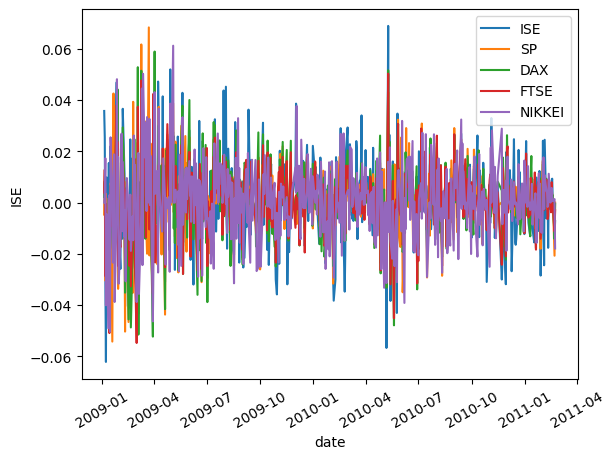

In [10]:
sns.lineplot(data=data, x='date', y='ISE', label='ISE')
sns.lineplot(data=data, x='date', y='SP', label='SP')
sns.lineplot(data=data, x='date', y='DAX', label='DAX')
sns.lineplot(data=data, x='date', y='FTSE', label='FTSE')
sns.lineplot(data=data, x='date', y='NIKKEI', label='NIKKEI')

plt.xticks(rotation=30)
plt.legend()

<AxesSubplot:>

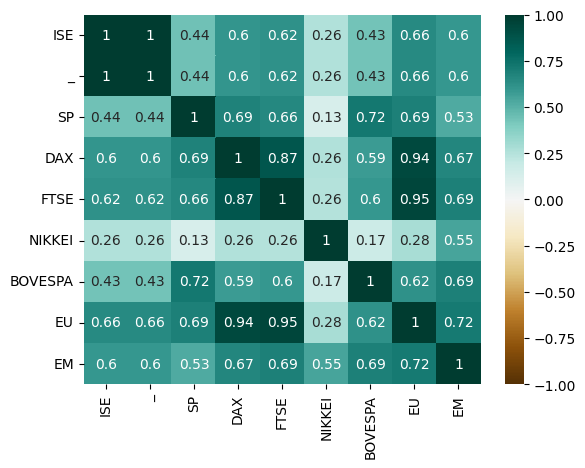

In [11]:
sns.heatmap(data.corr(), cmap='BrBG', annot=True, vmin=-1, vmax=1)

In [12]:
data.head()

,date,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.035754,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.025426,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.028862,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.062208,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009860,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [13]:
data.mean(axis=0)

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_1776\2773904261.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean(axis=0)


ISE        0.001629
_          0.001629
SP         0.000643
DAX        0.000721
FTSE       0.000510
NIKKEI     0.000308
BOVESPA    0.000935
EU         0.000471
EM         0.000936
dtype: float64

In [14]:
data[data.columns[1]]

0      0.035754
1      0.025426
2     -0.028862
3     -0.062208
4      0.009860
         ...   
531    0.008599
532    0.009310
533    0.000191
534   -0.013069
535   -0.007246
Name: ISE, Length: 536, dtype: float64

In [15]:
#normalization

data_processed = data.copy()

for i in data_processed.columns[1:]:
    data_processed[i] = data_processed[i] - data_processed.mean(axis=0)[i] 

C:\Users\rfakhrutdinov\AppData\Local\Temp\ipykernel_1776\2743710922.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_processed[i] = data_processed[i] - data_processed.mean(axis=0)[i]


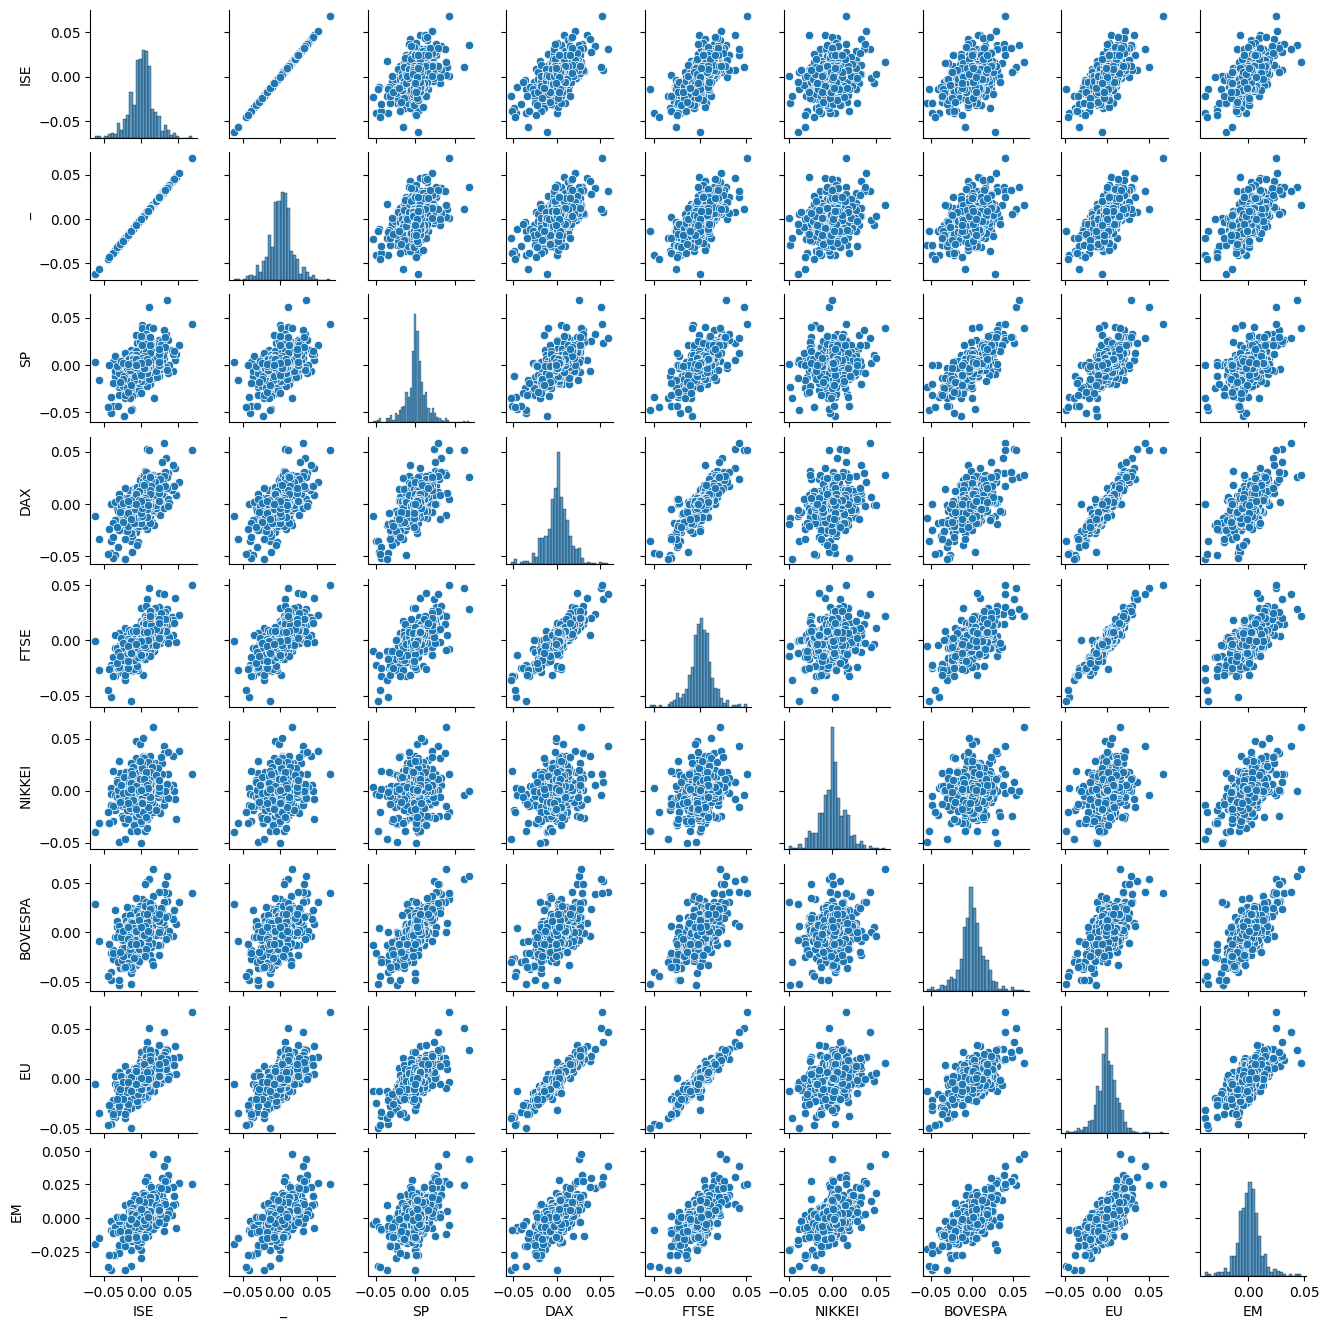

In [16]:
sns.pairplot(data,height=1.5)

In [17]:
data_processed

,date,ISE,_,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.034125,0.034125,-0.005323,0.001473,0.003384,-0.000308,0.030255,0.012227,0.027589
1,2009-01-06,0.023797,0.023797,0.007143,0.007735,0.012355,0.003855,0.017984,0.010870,0.007837
2,2009-01-07,-0.030491,-0.030491,-0.031112,-0.018554,-0.029245,0.016985,-0.036834,-0.017543,-0.020951
3,2009-01-08,-0.063837,-0.063837,0.002748,-0.012447,-0.000976,-0.040369,0.027348,-0.006032,-0.020360
4,2009-01-09,0.008231,0.008231,-0.022177,-0.020594,-0.013220,-0.004781,-0.010699,-0.011459,-0.008738
...,...,...,...,...,...,...,...,...,...,...
531,2011-02-16,0.006970,0.006970,0.005595,0.001204,0.007442,0.005410,0.017435,0.006504,0.002103
532,2011-02-17,0.007681,0.007681,0.002428,-0.001907,-0.000165,0.002312,0.000750,-0.001051,0.000103
533,2011-02-18,-0.001438,-0.001438,0.001280,0.002151,-0.001233,0.000261,0.004693,0.000101,0.006002
534,2011-02-21,-0.014698,-0.014698,-0.021385,-0.014960,-0.011785,0.001050,-0.012877,-0.013086,-0.001894


In [18]:
cm = data_processed.cov()

<AxesSubplot:>

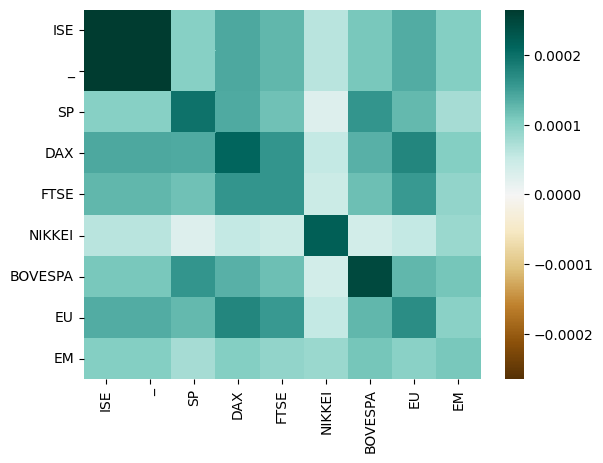

In [19]:
sns.heatmap(cm, cmap='BrBG', vmax=0.000265, vmin=-0.000265)

In [20]:
cm.max()

ISE        0.000265
_          0.000265
SP         0.000199
DAX        0.000212
FTSE       0.000160
NIKKEI     0.000221
BOVESPA    0.000248
EU         0.000177
EM         0.000114
dtype: float64

In [21]:
l, V = np.linalg.eig(cm)

In [22]:
V

array([[ 4.01848885e-01,  4.98108472e-01,  2.41585462e-01,
        -1.62181820e-01,  6.18463668e-02, -7.07106781e-01,
        -1.23848910e-02,  3.62481175e-02,  2.11343532e-02],
       [ 4.01848885e-01,  4.98108472e-01,  2.41585462e-01,
        -1.62181820e-01,  6.18463668e-02,  7.07106781e-01,
        -1.23848910e-02,  3.62481175e-02,  2.11343532e-02],
       [ 3.10662171e-01, -4.11953275e-01,  6.94949942e-02,
        -1.42266907e-01,  8.10346438e-01, -3.08347044e-16,
         7.87389672e-03, -1.85075573e-01, -1.33183228e-01],
       [ 3.76779055e-01, -1.78002495e-01,  2.51942989e-03,
         4.74807932e-01, -4.66068472e-02,  2.05789659e-17,
        -3.08172951e-01, -6.13956735e-02,  7.07100799e-01],
       [ 3.29099075e-01, -1.28987255e-01,  9.97115256e-03,
         3.69039716e-01, -1.77856493e-01, -9.96606789e-16,
        -4.74872244e-01,  2.31462354e-01, -6.54259085e-01],
       [ 1.61715896e-01,  2.53249687e-01, -9.02958857e-01,
        -3.49673297e-02,  1.96368362e-01, -2.874949

In [23]:
l

array([ 1.15073812e-03,  2.53894648e-04,  2.09147723e-04,  1.22823325e-04,
        6.06541241e-05, -1.15681857e-19,  5.14671984e-06,  2.07268270e-05,
        2.42312538e-05])

In [31]:
def permutate(x, i, j):
    result = x.copy()
    result[i] = x[j]
    result[j] = x[i]
    return result

def get_correct_order(x):
    order = list(range(len(x)))
    correct = Fal
    ц
    for i in range(len(x)):
        for j in range(len(x)):
            if x[i] < x[j]:
                order = permutate(order, i, j)
                x = permutate(x, i, j)
    return x, order

In [32]:
get_correct_order(l)

(array([-1.15681857e-19,  5.14671984e-06,  2.07268270e-05,  2.42312538e-05,
         6.06541241e-05,  1.22823325e-04,  2.09147723e-04,  2.53894648e-04,
         1.15073812e-03]),
 [5, 6, 7, 8, 4, 3, 2, 1, 0])